In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro, normaltest, anderson
#from sklearn.decomposition import PCA

In [2]:
quality = pd.read_csv('.\data\MiningProcess_Flotation_Plant_Database.csv', decimal=',')

In [3]:
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)

In [4]:
quality

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.20,16.98,3019.5300,557.434,395.713000,10.06640,1.74000,249.214,253.235,250.576,295.09600,306.400000,250.225,250.884000,457.396,432.9620,424.954000,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.20,16.98,3024.4100,563.965,397.383000,10.06720,1.74000,249.719,250.532,250.862,295.09600,306.400000,250.137,248.994000,451.891,429.5600,432.939000,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.20,16.98,3043.4600,568.054,399.668000,10.06800,1.74000,249.741,247.874,250.313,295.09600,306.400000,251.345,248.071000,451.240,468.9270,434.610000,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.20,16.98,3047.3600,568.665,397.939000,10.06890,1.74000,249.917,254.487,250.049,295.09600,306.400000,250.422,251.147000,452.441,458.1650,442.865000,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.20,16.98,3033.6900,558.167,400.254000,10.06970,1.74000,250.203,252.136,249.895,295.09600,306.400000,249.983,248.928000,452.441,452.9000,450.523000,453.670,462.598,443.682,425.679,66.91,1.31
5,2017-03-10 01:00:00,55.20,16.98,3079.1000,564.697,396.533000,10.07050,1.74000,250.730,248.906,249.521,295.09600,306.400000,250.356,251.873000,444.384,443.2690,460.449000,439.920,451.588,433.539,425.458,66.91,1.31
6,2017-03-10 01:00:00,55.20,16.98,3127.7900,566.467,392.900000,10.07130,1.74000,250.313,252.202,249.082,295.09600,306.400000,250.950,253.477000,446.185,444.5710,452.306000,431.328,443.548,444.575,431.251,66.91,1.31
7,2017-03-10 01:00:00,55.20,16.98,3152.9300,558.777,397.002000,10.07220,1.74000,249.895,253.630,249.258,295.09600,306.400000,249.456,253.345000,445.985,461.3410,461.640000,442.067,441.730,461.770,449.679,66.91,1.31
8,2017-03-10 01:00:00,55.20,16.98,3147.2700,556.030,394.307000,10.07300,1.74000,250.137,251.104,248.774,295.09600,306.400000,248.577,250.884000,446.686,478.3850,459.103000,455.074,439.798,457.738,455.915,66.91,1.31
9,2017-03-10 01:00:00,55.20,16.98,3142.5800,565.857,393.105000,10.07380,1.74000,249.653,252.202,248.203,295.09600,306.400000,248.511,248.137000,445.685,478.7790,460.665000,457.225,453.236,449.898,455.750,66.91,1.31


In [5]:
quality.shape

(737453, 24)

In [6]:
quality['date'] = pd.to_datetime(quality['date'])

In [7]:
quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
date                            737453 non-null datetime64[ns]
% Iron Feed                     737453 non-null float64
% Silica Feed                   737453 non-null float64
Starch Flow                     737453 non-null float64
Amina Flow                      737453 non-null float64
Ore Pulp Flow                   737453 non-null float64
Ore Pulp pH                     737453 non-null float64
Ore Pulp Density                737453 non-null float64
Flotation Column 01 Air Flow    737453 non-null float64
Flotation Column 02 Air Flow    737453 non-null float64
Flotation Column 03 Air Flow    737453 non-null float64
Flotation Column 04 Air Flow    737453 non-null float64
Flotation Column 05 Air Flow    737453 non-null float64
Flotation Column 06 Air Flow    737453 non-null float64
Flotation Column 07 Air Flow    737453 non-null float64
Flotation Column 01 Level       737453 non

In [8]:
quality.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000
mean,56.294739,14.651716,2869.140569,488.144697,397.578372,9.767639,1.680380,280.151856,277.159965,281.082397,299.447794,299.917814,292.071485,290.754856,520.244823,522.649555,531.352662,420.320973,425.251706,429.941018,421.021231,65.050068,2.326763
std,5.157744,6.807439,1215.203734,91.230534,9.699785,0.387007,0.069249,29.621288,30.149357,28.558268,2.572538,3.636579,30.217804,28.670105,131.014924,128.165050,150.842164,91.794432,84.535822,89.862225,84.891491,1.118645,1.125554
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,292.195000,286.295000,189.928000,185.962000,149.218000,210.752000,126.255000,162.201000,166.991000,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2076.320000,431.796000,394.264000,9.527360,1.647310,250.281000,250.457000,250.855000,298.262566,298.068000,262.541000,256.302000,416.978000,441.883000,411.325000,356.679000,357.653000,358.497000,356.772000,64.370000,1.440000
50%,56.080000,13.850000,3018.430000,504.393000,399.249000,9.798100,1.697600,299.344000,296.223000,298.696000,299.805000,299.887120,299.477000,299.011000,491.878000,495.956000,494.318000,411.974000,408.773000,424.664575,411.065000,65.210000,2.000000
75%,59.720000,19.600000,3727.730000,553.257000,402.968000,10.038000,1.728330,300.149000,300.690000,300.382000,300.638000,301.791137,303.061000,301.904000,594.114000,595.464000,601.249000,485.549000,484.329000,492.684000,476.465000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,305.871000,310.270000,370.910000,371.593000,862.274000,828.919000,886.822000,680.359000,675.644000,698.861000,659.902000,68.010000,5.530000


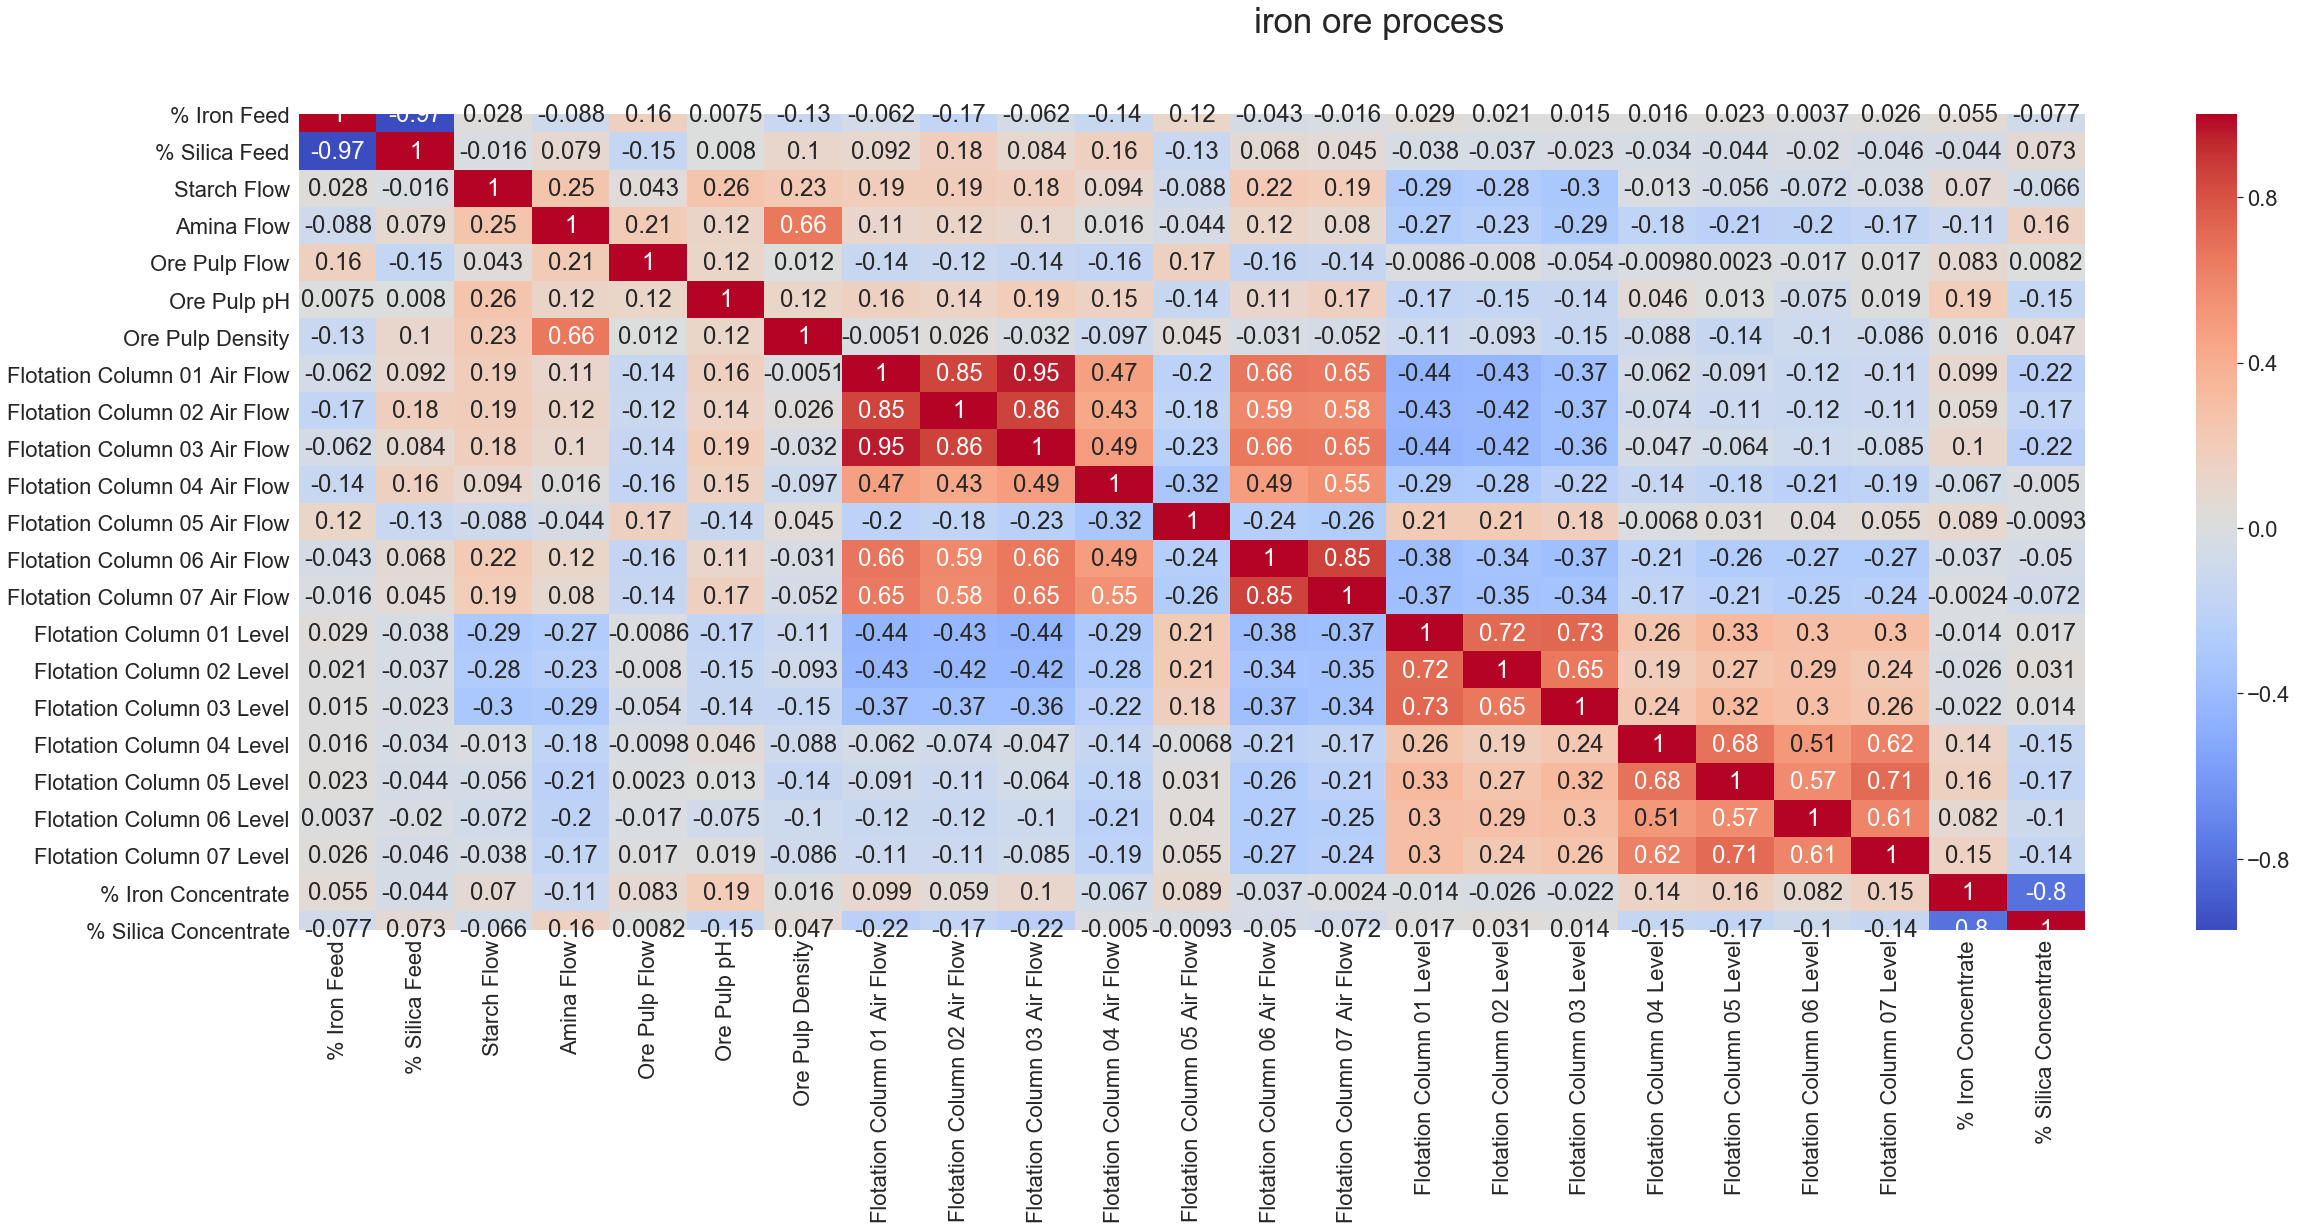

In [9]:
#correlarion between all variables
sns.set(font_scale=2)
plt.figure(figsize=(40,15))
sns.heatmap(quality.corr(), annot=True, cmap='coolwarm')
plt.suptitle('iron ore process', fontsize=35);

In [10]:
ss = StandardScaler()
quality_ss = pd.DataFrame(ss.fit_transform(quality.iloc[0:,1:24]))

In [11]:
quality_ss.columns = quality.iloc[0:,1:24].columns

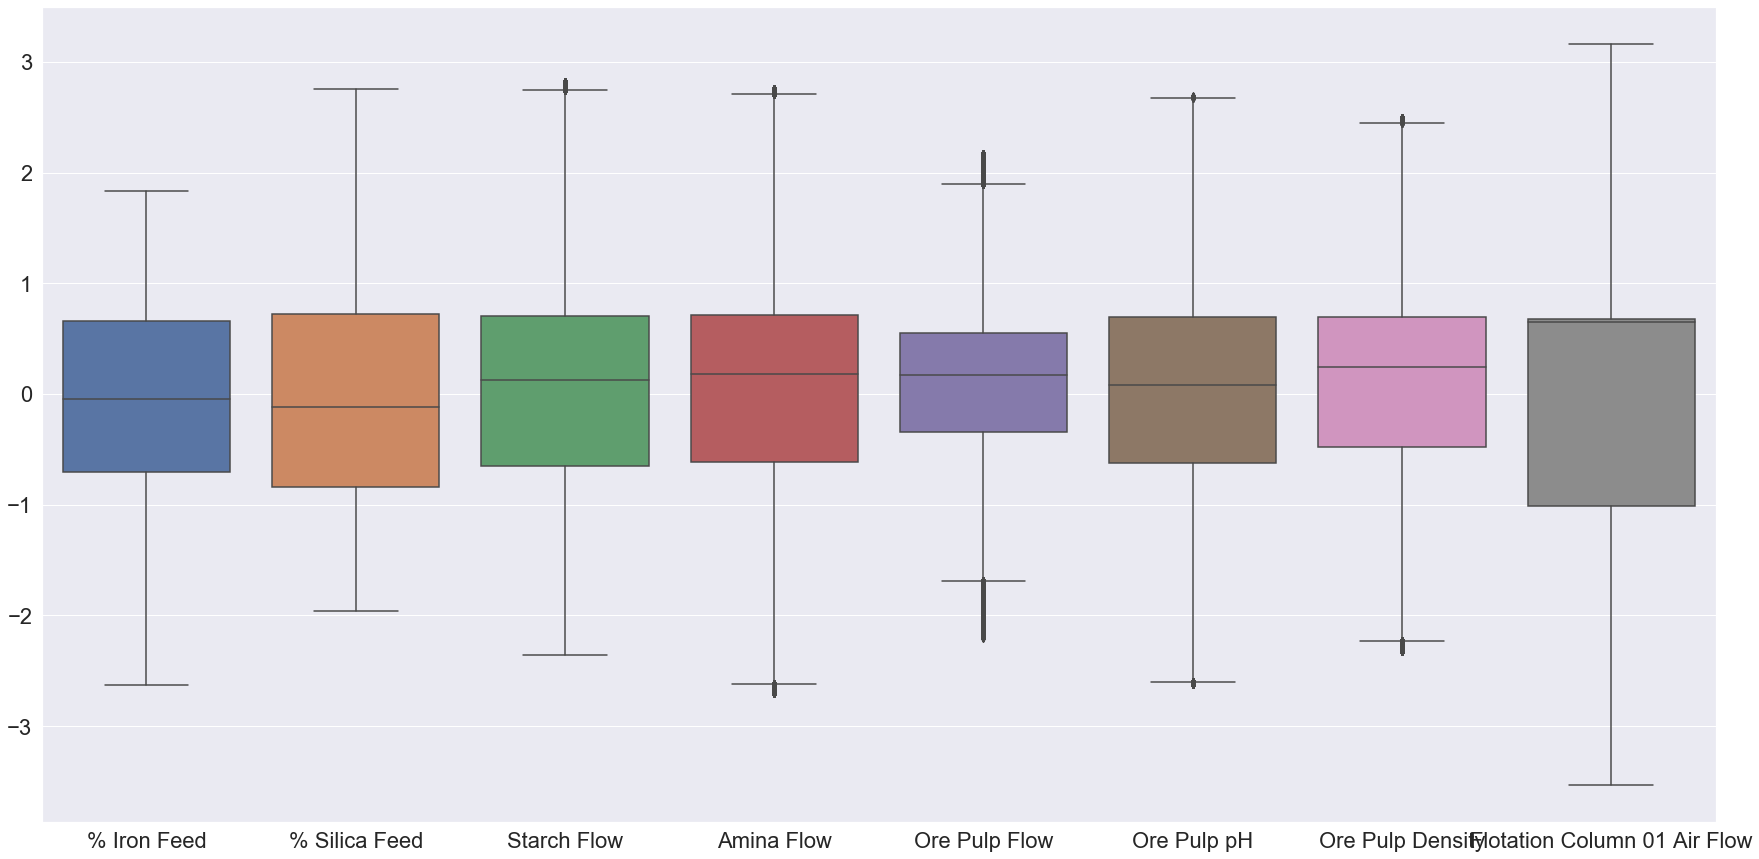

In [12]:
#boxplot to visualise or detect any skewness or bi-modal
sns.set(font_scale=2)
plt.figure(figsize=(30,15))
sns.boxplot(data=quality_ss[['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH',
                          'Ore Pulp Density', 'Flotation Column 01 Air Flow']]);
plt.show()

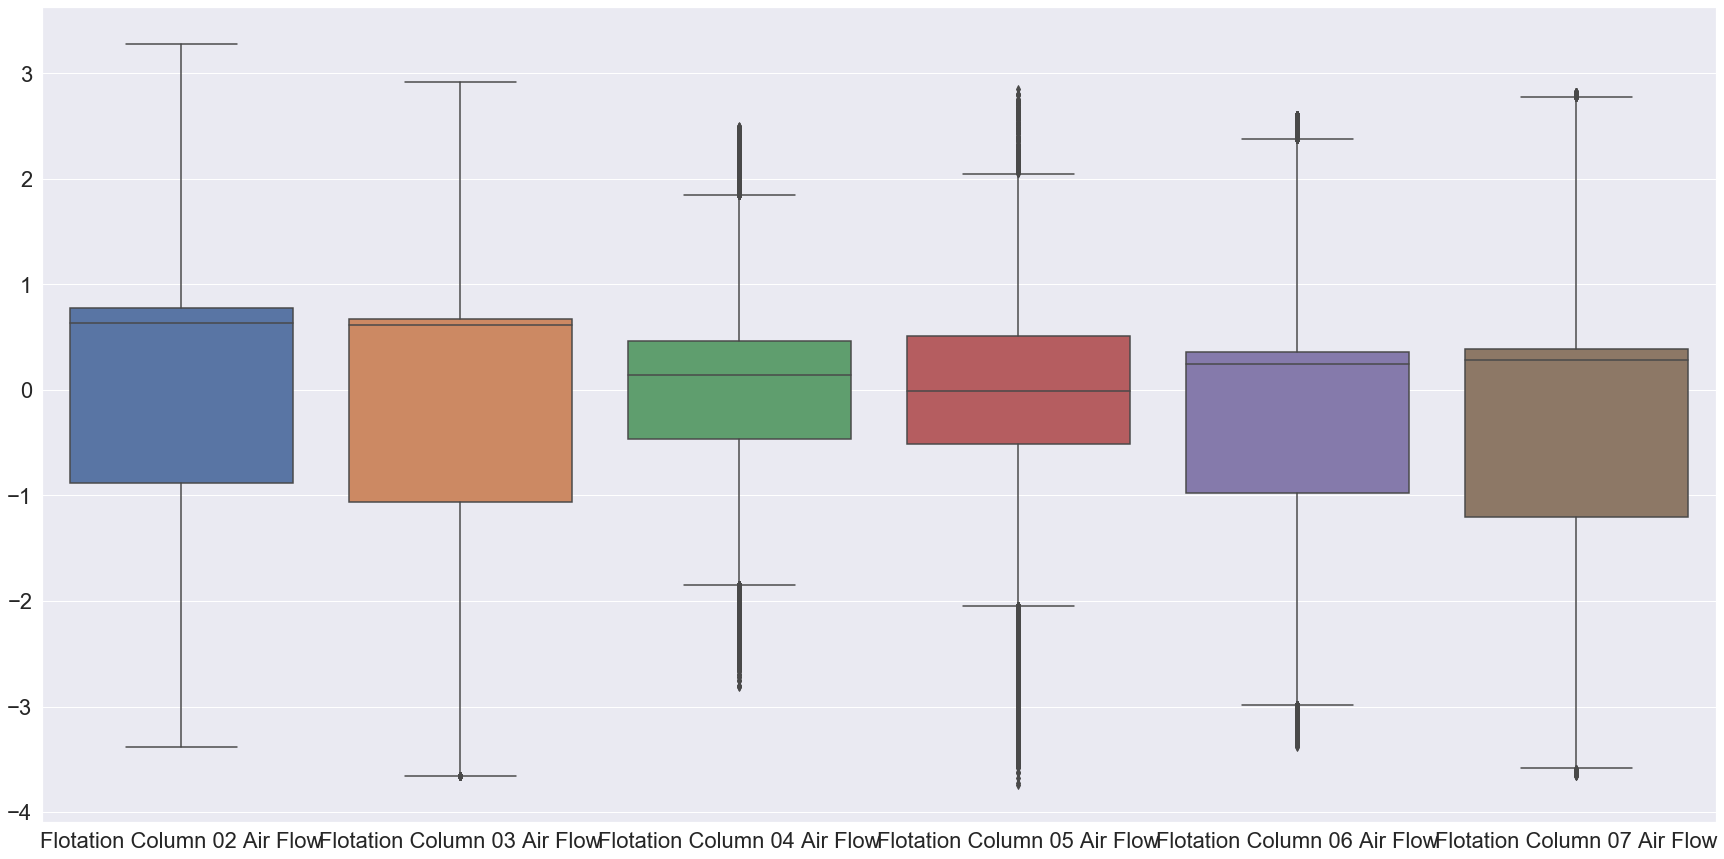

In [13]:
#boxplot to visualise or detect any skewness or bi-modal
sns.set(font_scale=2)
plt.figure(figsize=(30,15))
sns.boxplot(data=quality_ss[['Flotation Column 02 Air Flow', 'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
                             'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow', 'Flotation Column 07 Air Flow']]);
plt.show()

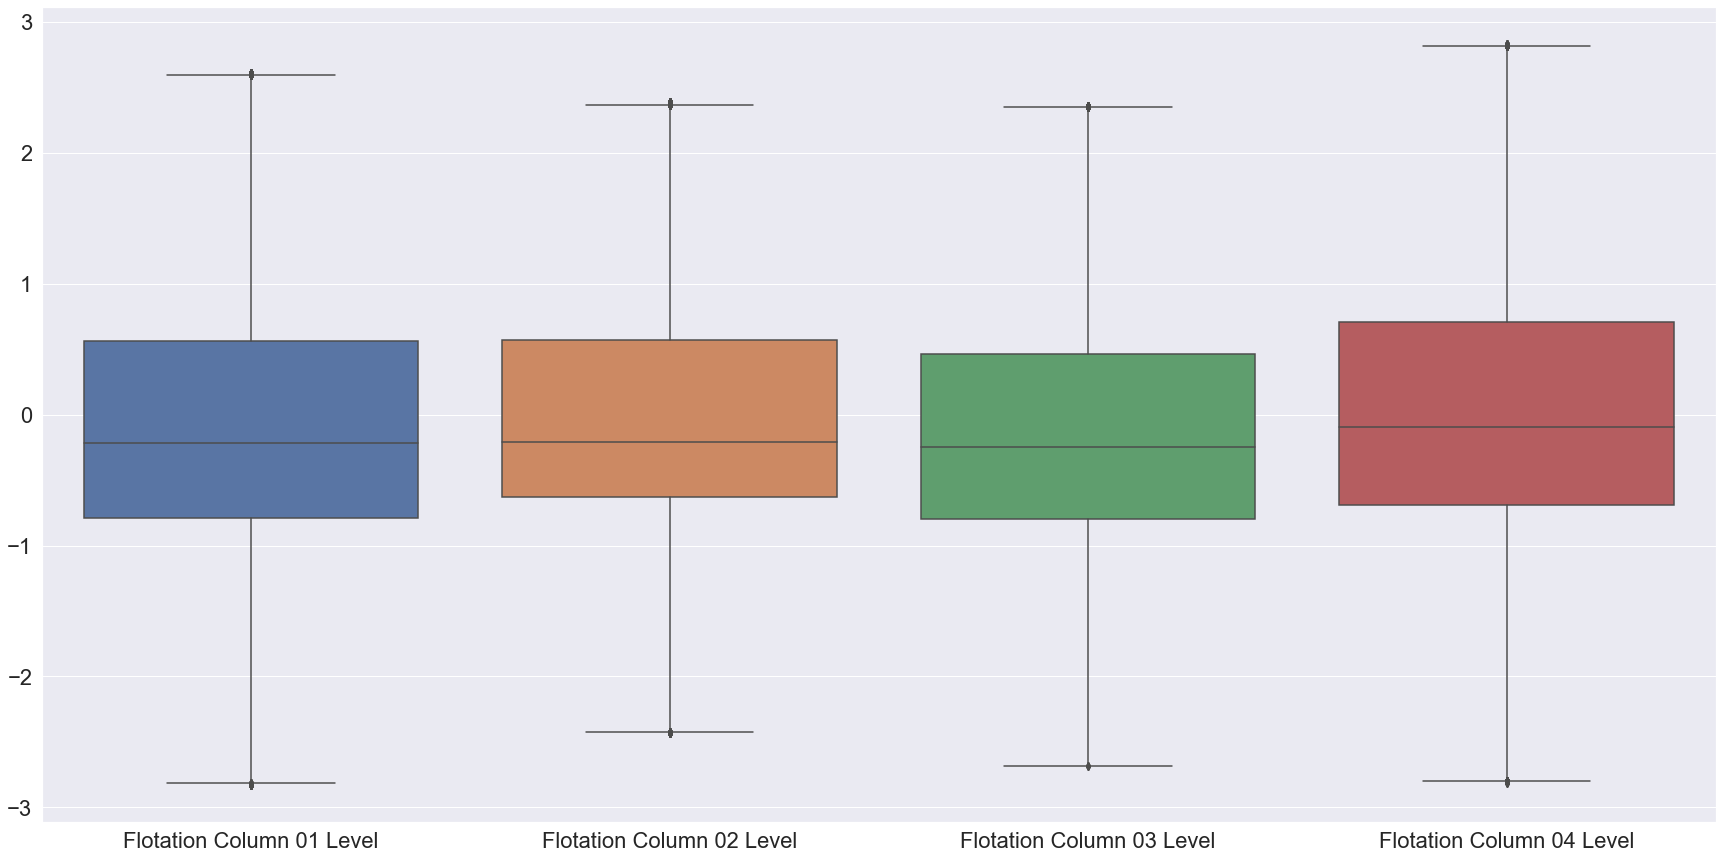

In [14]:
#boxplot to visualise or detect any skewness or bi-modal
sns.set(font_scale=2)
plt.figure(figsize=(30,15))
sns.boxplot(data=quality_ss[['Flotation Column 01 Level', 'Flotation Column 02 Level', 'Flotation Column 03 Level',
                             'Flotation Column 04 Level']]);
plt.show()

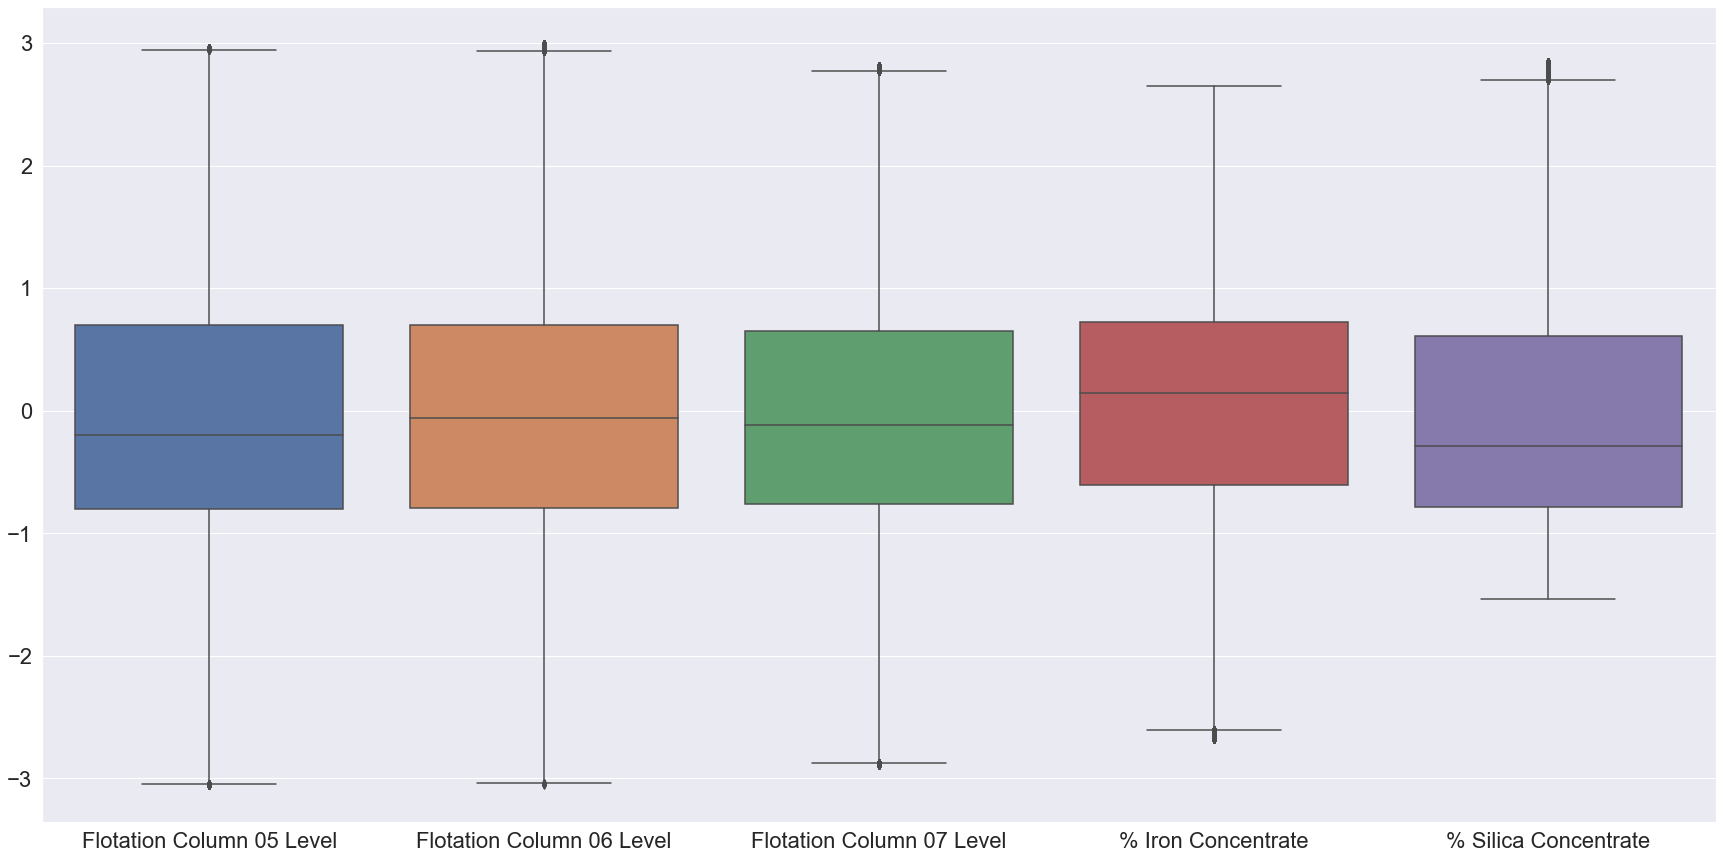

In [15]:
#boxplot to visualise or detect any skewness or bi-modal
sns.set(font_scale=2)
plt.figure(figsize=(30,15))
sns.boxplot(data=quality_ss[['Flotation Column 05 Level', 'Flotation Column 06 Level', 'Flotation Column 07 Level',
                             '% Iron Concentrate', '% Silica Concentrate']]);
plt.show()

### There are 4 bi/multi-modal variables

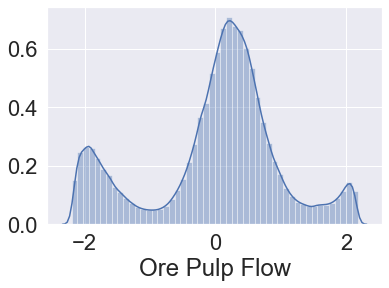

In [16]:
sns.distplot(quality_ss['Ore Pulp Flow']);

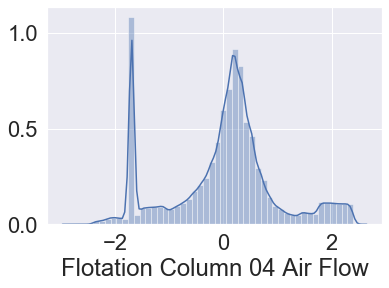

In [17]:
sns.distplot(quality_ss['Flotation Column 04 Air Flow'])

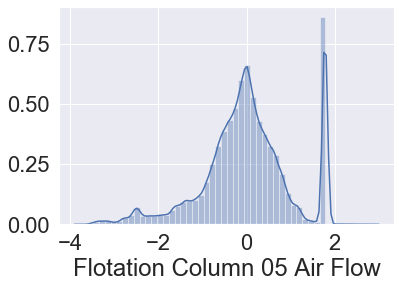

In [18]:
sns.distplot(quality_ss['Flotation Column 05 Air Flow'])

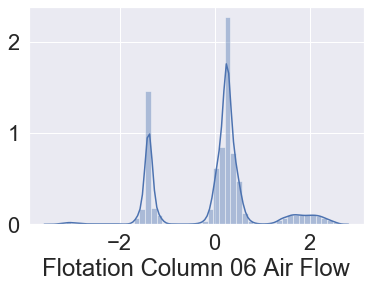

In [19]:
sns.distplot(quality_ss['Flotation Column 06 Air Flow'])

In [20]:
quality.columns

Index(['date', '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

In [21]:
quality_ss.columns

Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

In [22]:
train, test = train_test_split(quality, test_size=0.3, random_state=40)

In [23]:
X_train = train.drop(['date','% Iron Concentrate','% Silica Concentrate'], axis=1)
y_train = train['% Silica Concentrate']
X_test = test.drop(['date','% Iron Concentrate','% Silica Concentrate'], axis=1)
y_test = test['% Silica Concentrate']

# Linear Regression

In [24]:
lr = LinearRegression()

In [25]:
print(cross_val_score(lr, X_train, y_train, cv=5))
print(cross_val_score(lr, X_train, y_train, cv=5).mean())

[0.15213659 0.15359957 0.15147333 0.1510267  0.15089417]
0.1518260702032907


In [26]:
print(lr.fit(X_train, y_train).score(X_train, y_train))
print(lr.fit(X_train, y_train).score(X_test, y_test))

0.15190561913493827
0.15521450201517162


In [27]:
yhat = lr.fit(X_train, y_train).predict(X_test)
error_lr = pd.DataFrame(y_test - yhat)

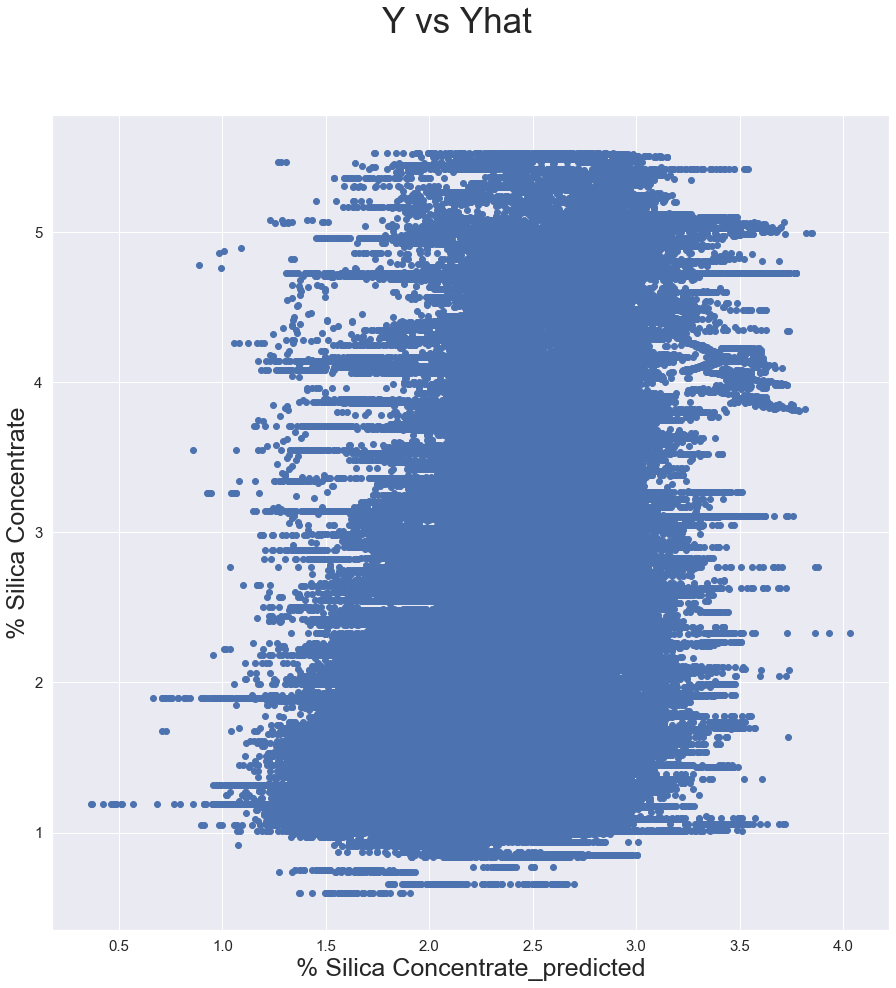

In [44]:
plt.figure(figsize=(15,15))
plt.scatter(yhat, y_test)
plt.suptitle('Y vs Yhat', fontsize=35)
plt.xlabel('% Silica Concentrate_predicted', fontsize=25)
plt.ylabel('% Silica Concentrate', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);
plt.show()

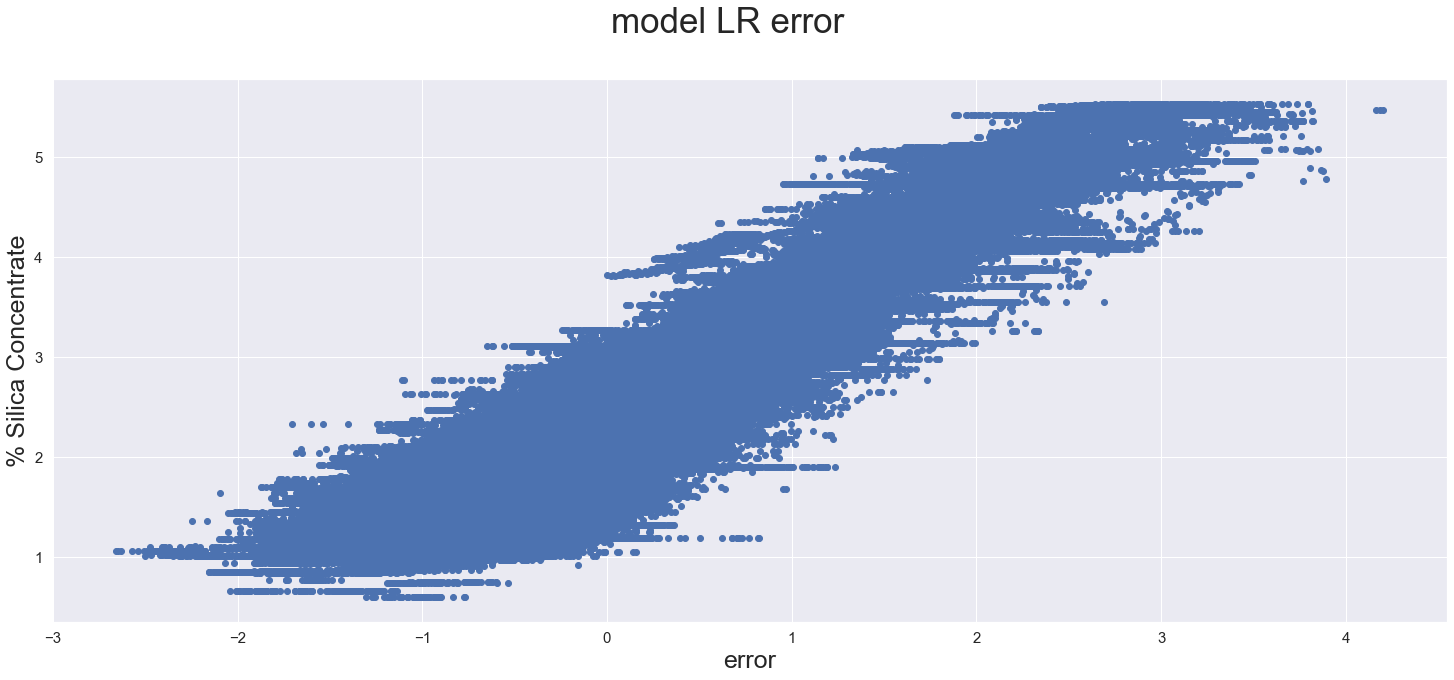

In [28]:
plt.figure(figsize=(25,10))
plt.scatter(error_lr, y_test)
plt.suptitle('model LR error', fontsize=35)
plt.xlabel('error', fontsize=25)
plt.ylabel('% Silica Concentrate', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);
plt.show()

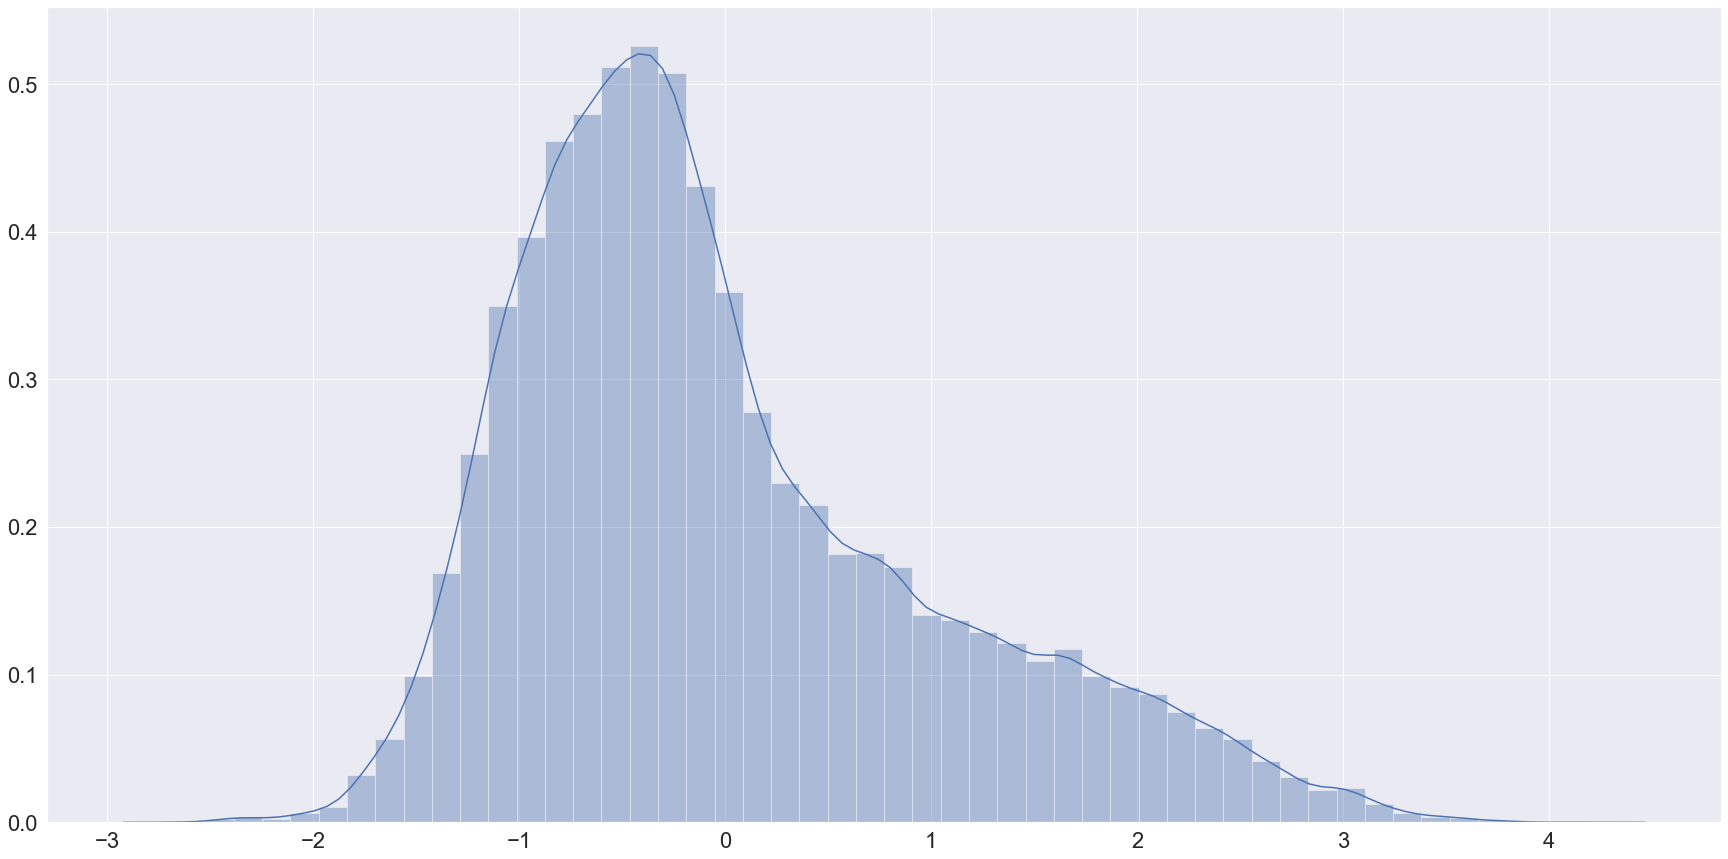

In [29]:
plt.figure(figsize=(30,15))
sns.distplot(error_lr)

## Linear Regression, as suspected, not a good model

# Random Forest Regression

In [32]:
rf = RandomForestRegressor(random_state=50)
rf.fit(X_train, y_train)

E:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=50, verbose=0,
                      warm_start=False)

In [46]:
# Show model results of training set
y_hat = rf.predict(X_train)
mae = metrics.mean_absolute_error(y_train,y_hat)
mse = metrics.mean_squared_error(y_train,y_hat)
print ("TRAINING SET")
print ("============")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", rf.score(X_train,y_train))

TRAINING SET
MAE:                 0.04039602655202616
RMSE:                0.1140624055354197
r2:                  0.9897389863346747


In [35]:
features = list(X_train.columns)
coefs = pd.DataFrame({'variable':features,'feature_importance':rf.feature_importances_})
#coefs
coefs.sort_values(by=['feature_importance'], ascending=False)

,variable,feature_importance
1,% Silica Feed,0.131065
5,Ore Pulp pH,0.121271
0,% Iron Feed,0.095456
3,Amina Flow,0.092274
10,Flotation Column 04 Air Flow,0.084589
6,Ore Pulp Density,0.080603
9,Flotation Column 03 Air Flow,0.051345
11,Flotation Column 05 Air Flow,0.046913
16,Flotation Column 03 Level,0.045981
14,Flotation Column 01 Level,0.043043


In [36]:
# Use test and show results of test set
y_testhat = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test,y_testhat)
mse = metrics.mean_squared_error(y_test,y_testhat)
print ("TEST SET")
print ("========")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", rf.score(X_test,y_test))

TEST SET
MAE:                 0.10163702495711852
RMSE:                0.24485478871125751
r2:                  0.9525830298644676


In [37]:
error = pd.DataFrame(y_test - y_testhat)

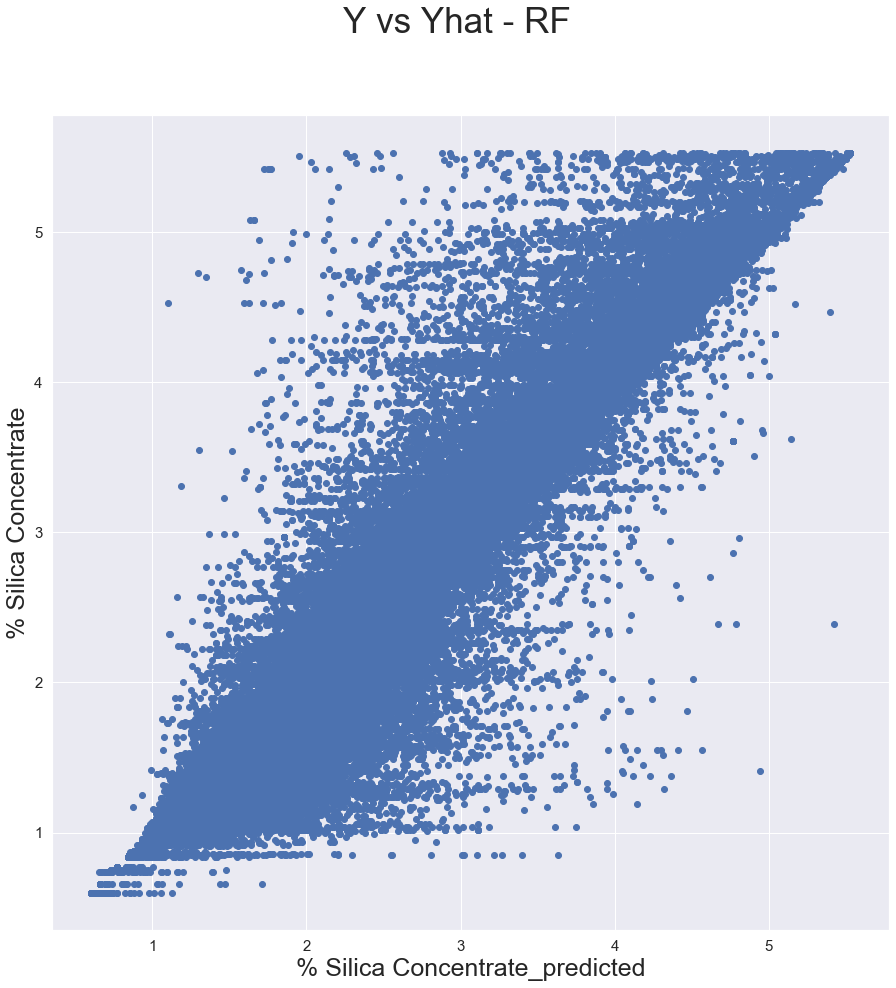

In [43]:
plt.figure(figsize=(15,15))
plt.scatter(y_testhat, y_test)
plt.suptitle('Y vs Yhat - RF', fontsize=35)
plt.xlabel('% Silica Concentrate_predicted', fontsize=25)
plt.ylabel('% Silica Concentrate', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);
plt.show()

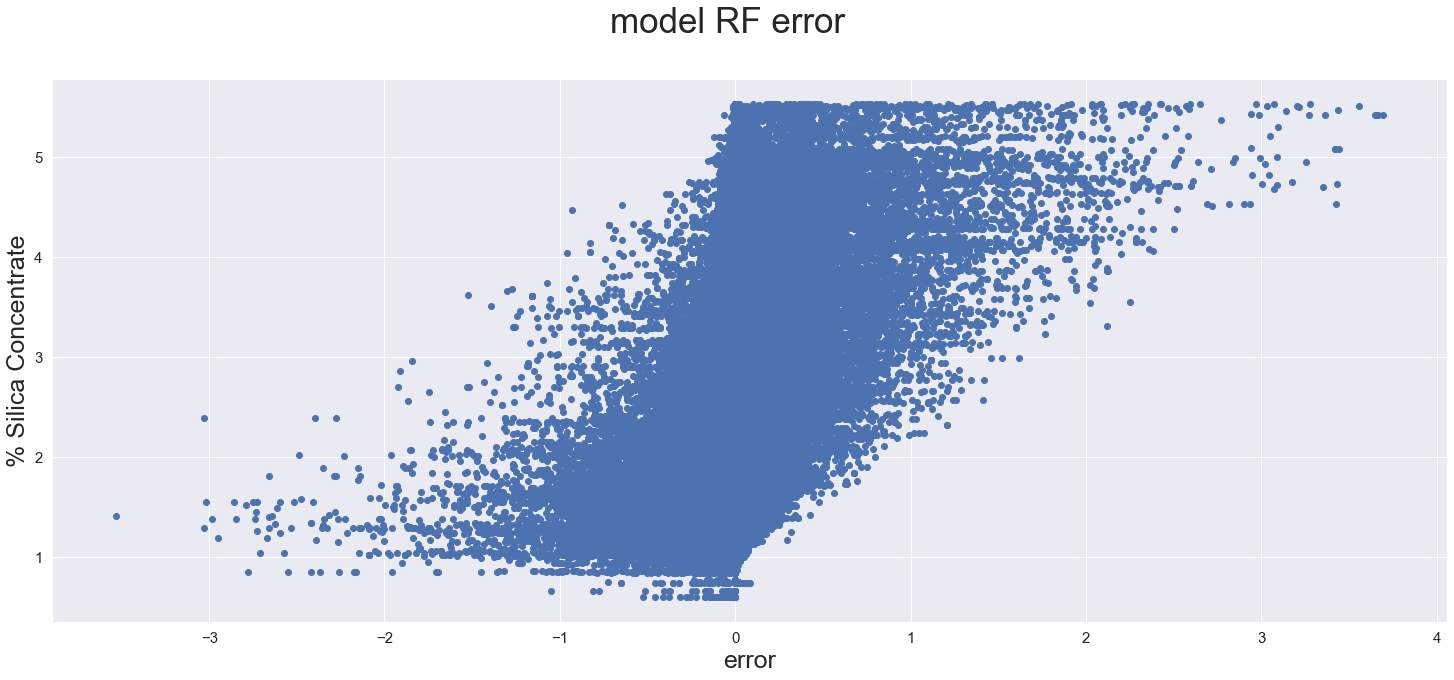

In [38]:
plt.figure(figsize=(25,10))
plt.scatter(error, y_test)
plt.suptitle('model RF error', fontsize=35)
plt.xlabel('error', fontsize=25)
plt.ylabel('% Silica Concentrate', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);
plt.show()

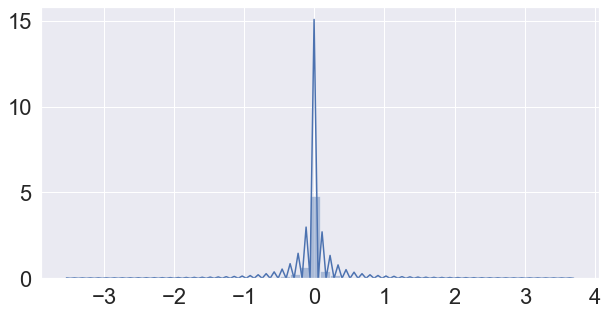

In [48]:
plt.figure(figsize=(10,5))
sns.distplot(error)

# Conclusion:
### * Iron ore concentrate quality is impacted by the impurity which is represented by silica content.
### * Random Forest Regression performs very well & able to explain 95-98% of the variability.
### * Top 10 important variables impacting iron ore concentrate quality are as follow:

|variable|feature_importance|
|---|---|
|% Silica Feed|0.131065|
|Ore Pulp pH|0.121271|
|% Iron Feed|0.095456|
|Amina Flow|0.092274|
|Flotation Column 04 Air Flow|0.084589|
|Ore Pulp Density|0.080603|
|Flotation Column 03 Air Flow|0.051345|
|Flotation Column 05 Air Flow|0.046913|
|Flotation Column 03 Level|0.045981|
|Flotation Column 01 Level|0.043043|

# Future works:
### * Consider transforming bi-modal & multi-modal variable.
### * Dimension reduction with PCA.